In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os,json
sys.path.append(os.path.join("..",".."))

In [3]:
from benchmarks.utils import *
from benchmarks.problem_json import *
from src.models.single_bin_creel.anchor.model import AnchorSBMCreel

In [4]:
problems = [
    #(100,100),
    #(200,200),
    #(300,300),
    (100,400), # 1 minute
    # (200,450),
    #(100,900) # 4 minutes
]

[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b

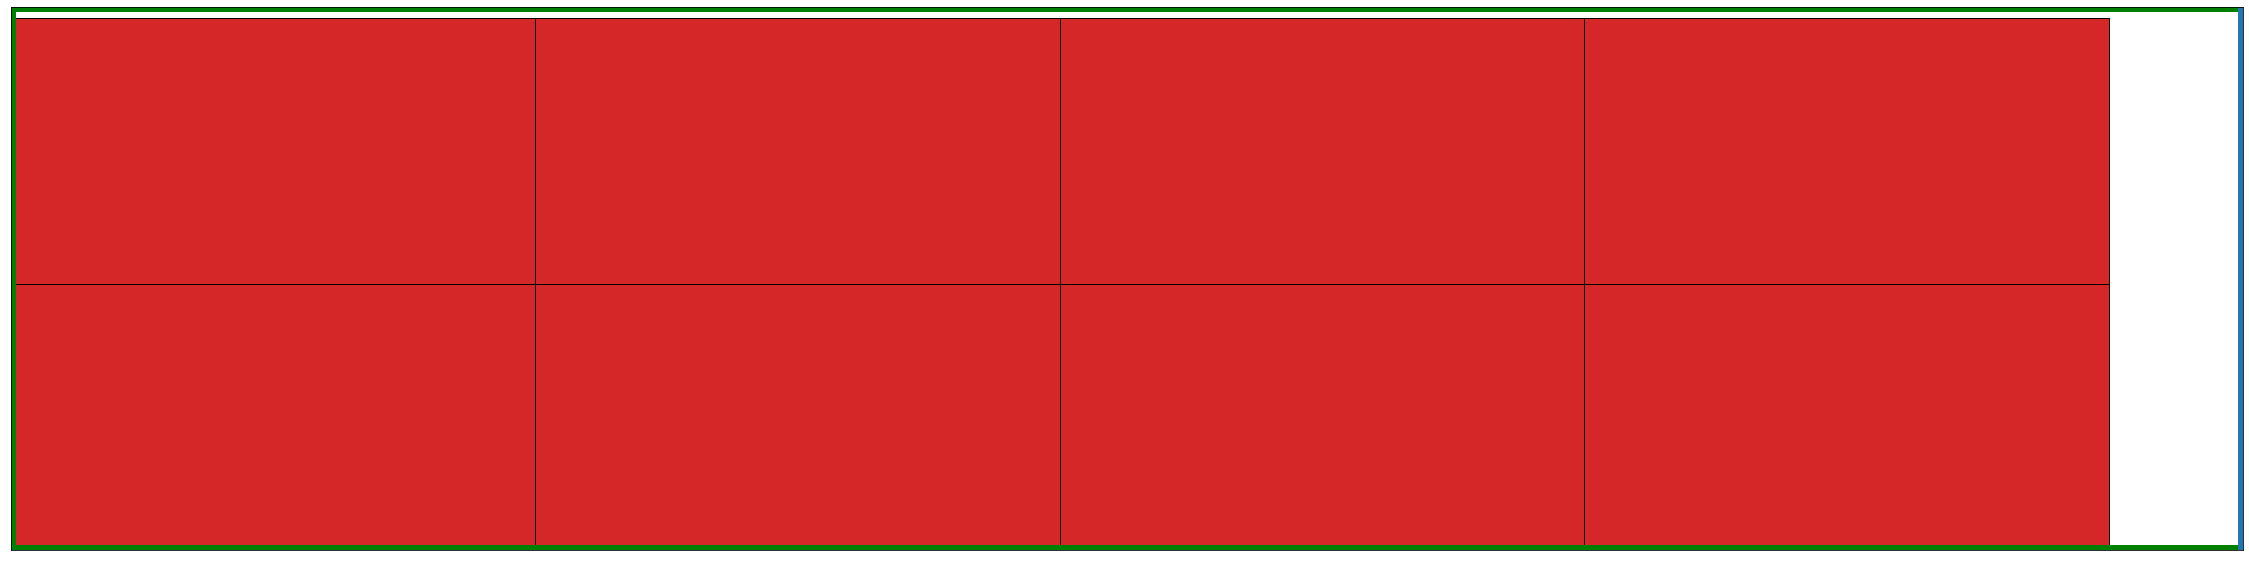

PROBLEM 4_100_400_1
{'widths': [83, 35, 24, 29], 'heights': [53, 27, 46, 37], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
[IV924, IV925, IV926, IV931, IV932, IV933, IV938, IV939, IV940, IV941, IV947]
[IV927, IV928, IV929, IV934, IV935, IV936, IV942, IV943, IV944, IV945, IV948]
[(IV924) + (IV927), (IV925) + (IV928), (IV926) + (IV929), (IV931) + (IV934), (IV932) + (IV935), (IV933) + (IV936), (IV938) + (IV942), (IV939) + (IV943), (IV940) + (IV944), (IV941) + (IV945), (IV947) + (IV948)]
[IV923 > 0, IV923 > 1, IV923 > 2, IV930 > 0, IV930 > 1, IV930 > 2, IV937 > 0, IV937 > 1, IV937 > 2, IV937 > 3, IV946 > 0]
nr_no_overlap 5595
Transferring...
Solving...
SAT True
TIME 18.823157100006938
{'item_count': {'nr_constraint': 8, 'creation_time': 0.006637000013142824}, 'item_selection': {'nr_constraint': 8, 'creation_time': 0.0001542000100016594}, 'no_overlap': {'nr_constraint': 5595, 'creation_time': 1.3833306001033634}, 'bin_height': {'nr_constraint': 1, 'creation_time':

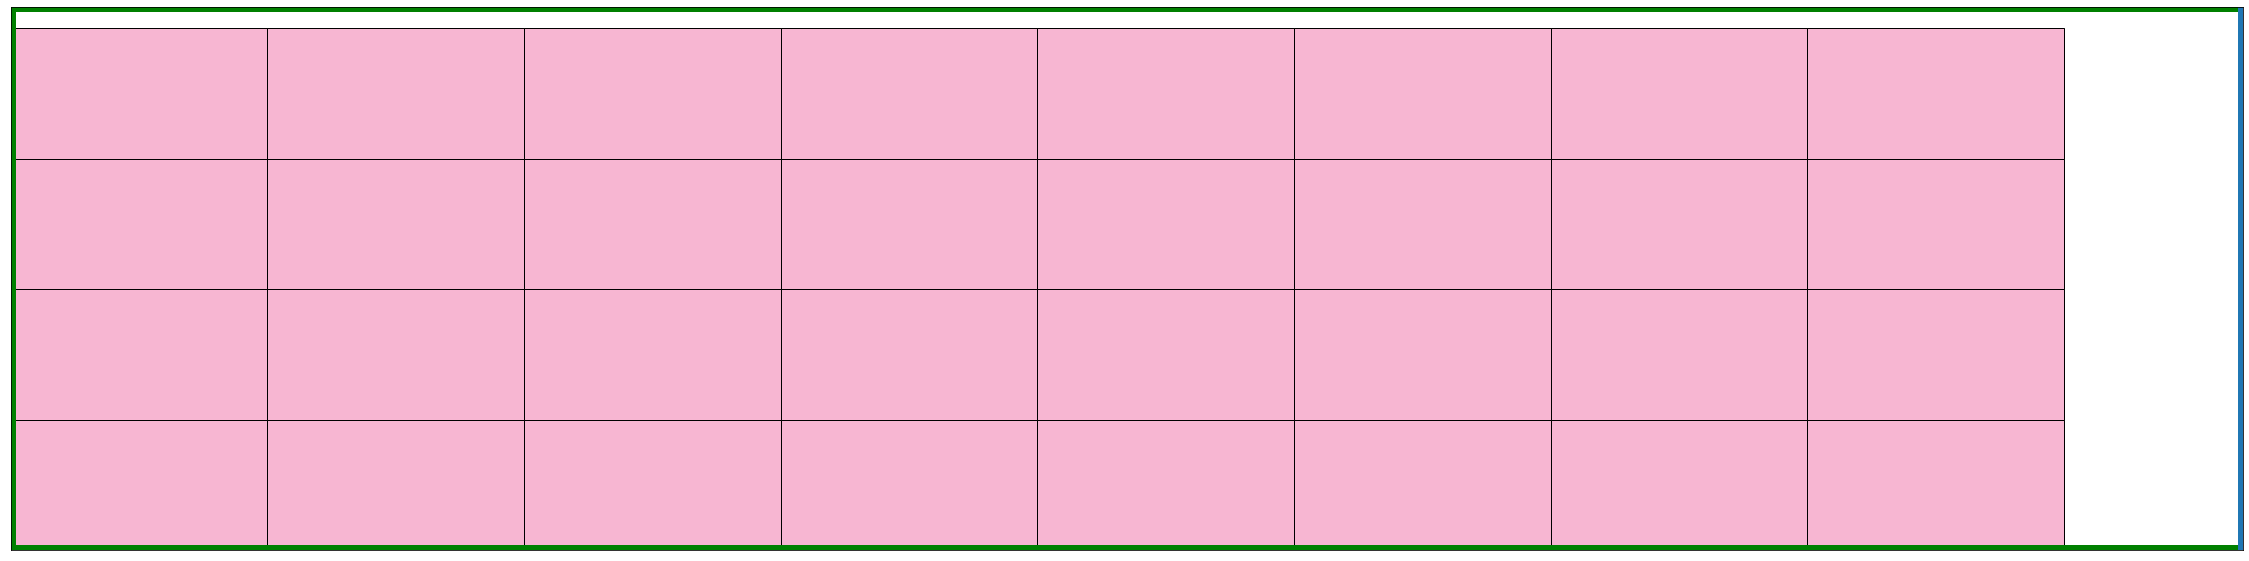

PROBLEM 4_100_400_2
{'widths': [37, 49, 37, 78], 'heights': [24, 28, 63, 57], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
[IV1876, IV1877, IV1878, IV1883, IV1886, IV1887, IV1891, IV1892, IV1893, IV1894]
[IV1879, IV1880, IV1881, IV1884, IV1888, IV1889, IV1895, IV1896, IV1897, IV1898]
[(IV1876) + (IV1879), (IV1877) + (IV1880), (IV1878) + (IV1881), (IV1883) + (IV1884), (IV1886) + (IV1888), (IV1887) + (IV1889), (IV1891) + (IV1895), (IV1892) + (IV1896), (IV1893) + (IV1897), (IV1894) + (IV1898)]
[IV1875 > 0, IV1875 > 1, IV1875 > 2, IV1882 > 0, IV1885 > 0, IV1885 > 1, IV1890 > 0, IV1890 > 1, IV1890 > 2, IV1890 > 3]
nr_no_overlap 4011
Transferring...
Solving...
SAT True
TIME 15.038310200208798
{'item_count': {'nr_constraint': 8, 'creation_time': 0.004786500008776784}, 'item_selection': {'nr_constraint': 8, 'creation_time': 0.00015279999934136868}, 'no_overlap': {'nr_constraint': 4011, 'creation_time': 0.8390976001974195}, 'bin_height': {'nr_constraint': 1, 'creation

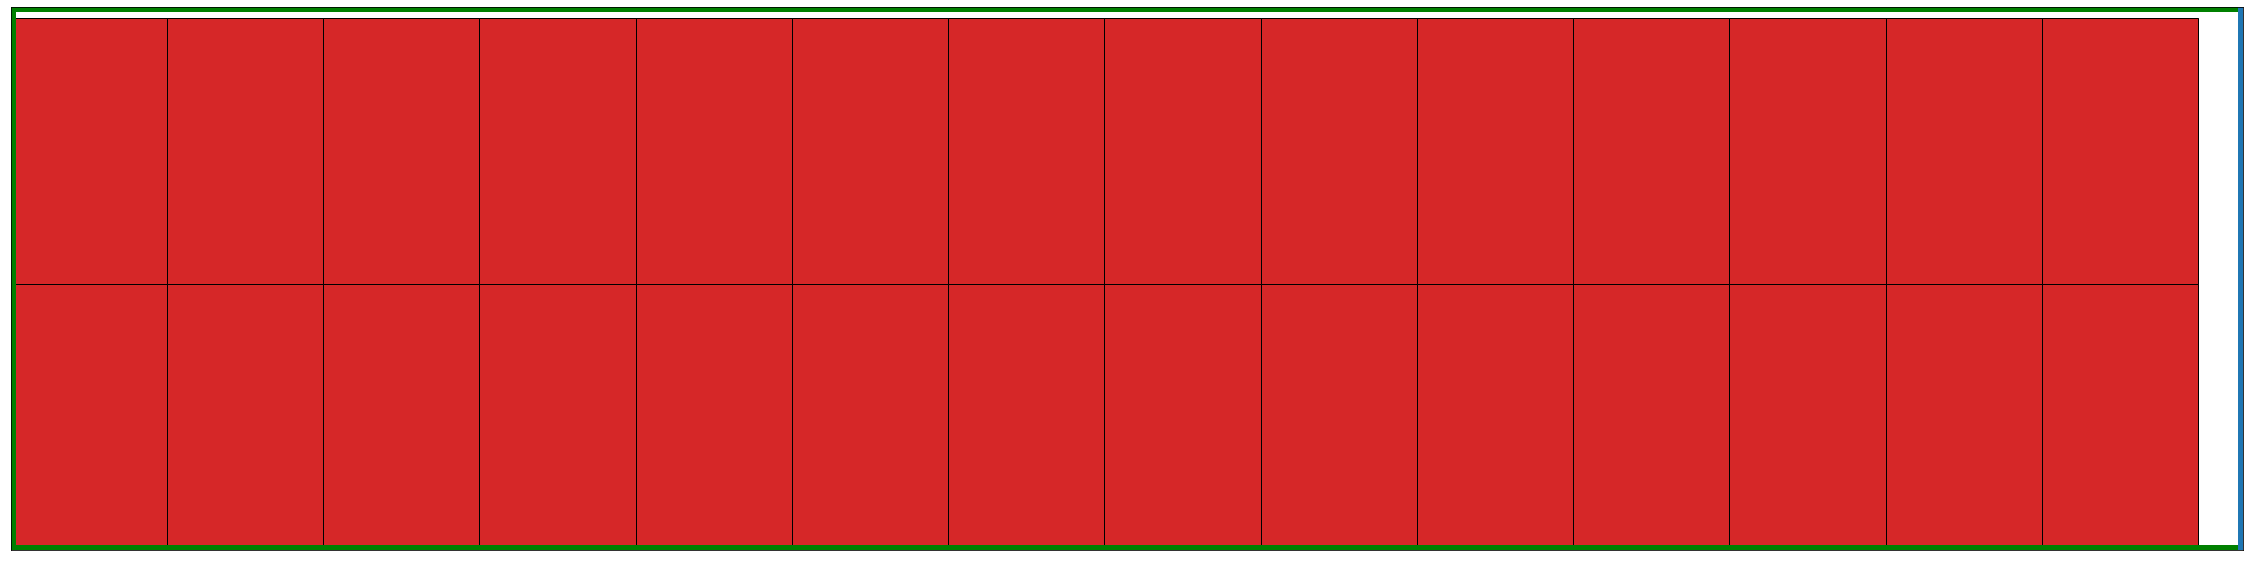

PROBLEM 4_100_400_3
{'widths': [25, 60, 65, 56], 'heights': [41, 35, 38, 54], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
[IV2667, IV2668, IV2672, IV2675, IV2676, IV2680, IV2681, IV2682, IV2683]
[IV2669, IV2670, IV2673, IV2677, IV2678, IV2684, IV2685, IV2686, IV2687]
[(IV2667) + (IV2669), (IV2668) + (IV2670), (IV2672) + (IV2673), (IV2675) + (IV2677), (IV2676) + (IV2678), (IV2680) + (IV2684), (IV2681) + (IV2685), (IV2682) + (IV2686), (IV2683) + (IV2687)]
[IV2666 > 0, IV2666 > 1, IV2671 > 0, IV2674 > 0, IV2674 > 1, IV2679 > 0, IV2679 > 1, IV2679 > 2, IV2679 > 3]
nr_no_overlap 2849
Transferring...


KeyboardInterrupt: 

In [5]:
nr_item_types = [4]

for minutes in [1]:
    for nr_item_type in nr_item_types:
        for problem in problems:

            x, y = problem
            #for x in range(1,y+1):
            file_name = str(nr_item_type) + "_" + str(x) + "_" + str(y) 

            f = open(os.path.join(os.getcwd(), "problems", file_name + ".json"))
            data = json.load(f)

            run_single_bin_benchmark_repeated([AnchorSBMCreel], (ProblemJsonCS.init_from_file(data)), max_time_seconds=60*minutes, nr_repeats=1)